In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [84]:
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [85]:
df.shape

(9994, 11)

In [86]:
df.dtypes

Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object

In [87]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True, errors='coerce')
df.dtypes

Order ID                 object
Customer Name            object
Category                 object
Sub Category             object
City                     object
Order Date       datetime64[ns]
Region                   object
Sales                     int64
Discount                float64
Profit                  float64
State                    object
dtype: object

In [88]:
df.dropna(subset=['Order Date'], inplace=True)
df['Order Day'] = df['Order Date'].dt.day
df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-08-11,North,1254,0.12,401.28,Tamil Nadu,11,8,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-08-11,South,749,0.18,149.80,Tamil Nadu,11,8,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-12-06,West,2360,0.21,165.20,Tamil Nadu,6,12,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-11-10,South,896,0.25,89.60,Tamil Nadu,10,11,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-11-10,South,2355,0.26,918.45,Tamil Nadu,10,11,2016


In [89]:
df.drop_duplicates(inplace=True)
df.shape

(9994, 14)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Customer Name  9994 non-null   object        
 2   Category       9994 non-null   object        
 3   Sub Category   9994 non-null   object        
 4   City           9994 non-null   object        
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   object        
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   object        
 11  Order Day      9994 non-null   int32         
 12  Order Month    9994 non-null   int32         
 13  Order Year     9994 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(7)
memory u

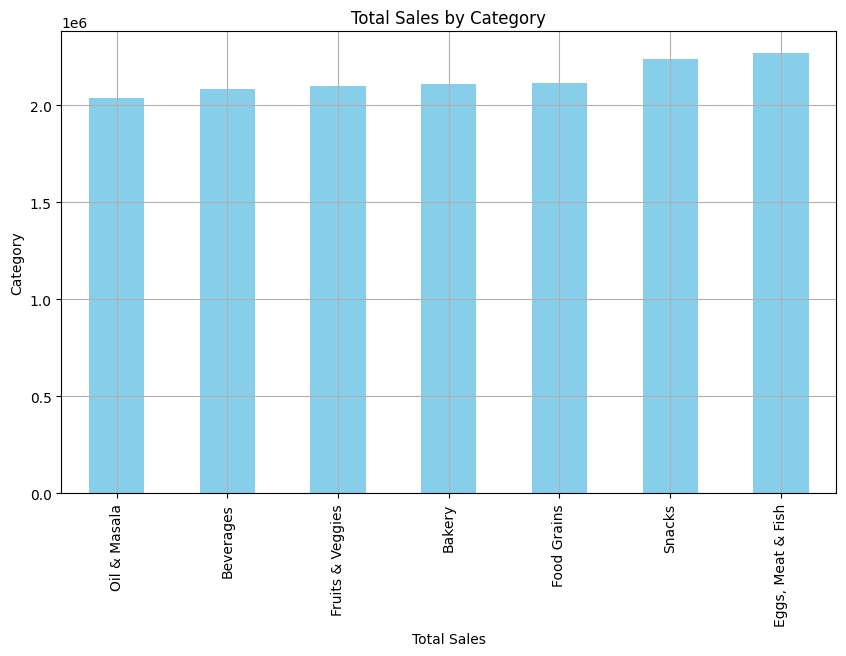

In [91]:
df.groupby("Category")["Sales"].sum().sort_values().plot(
    kind='bar', figsize=(10,6), color='skyblue')
plt.title("Total Sales by Category")
plt.xlabel("Total Sales")
plt.ylabel("Category")
plt.grid(True)
plt.show()

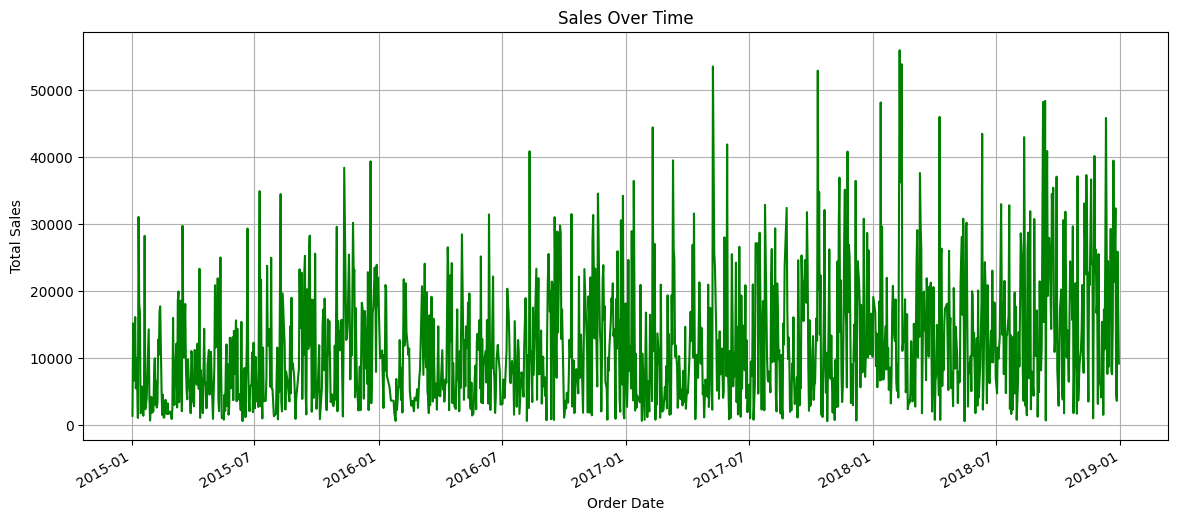

In [92]:
df.groupby("Order Date")["Sales"].sum().plot(
    figsize=(14,6), color='green')
plt.title("Sales Over Time")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

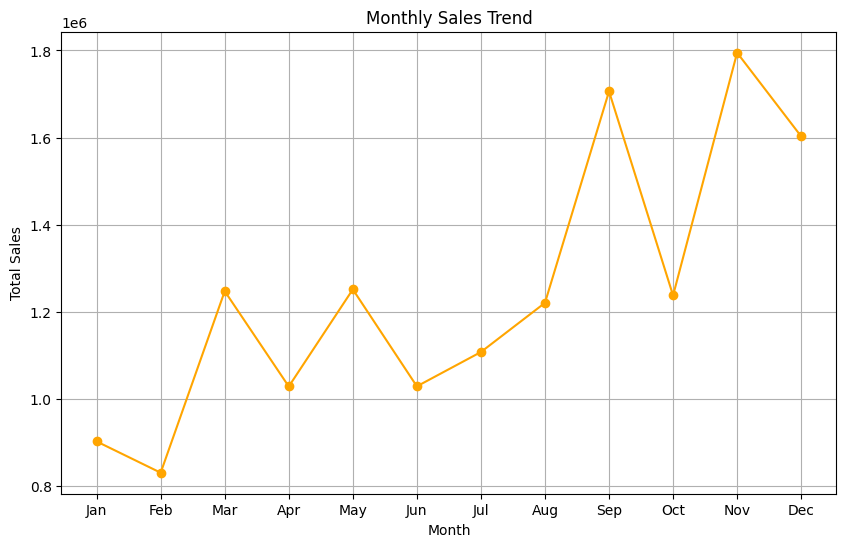

In [93]:
df.groupby("Order Month")["Sales"].sum().plot(
    kind='line', marker='o', figsize=(10,6), color='orange')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(
    ticks=range(1, 13),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
)
plt.grid(True)
plt.show()

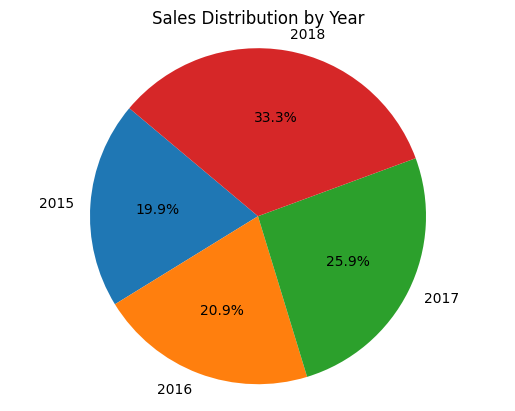

In [94]:
yearly_sales = df.groupby("Order Year")["Sales"].sum()
plt.pie(yearly_sales, labels=yearly_sales.index,
        autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Year")
plt.axis('equal')
plt.show()

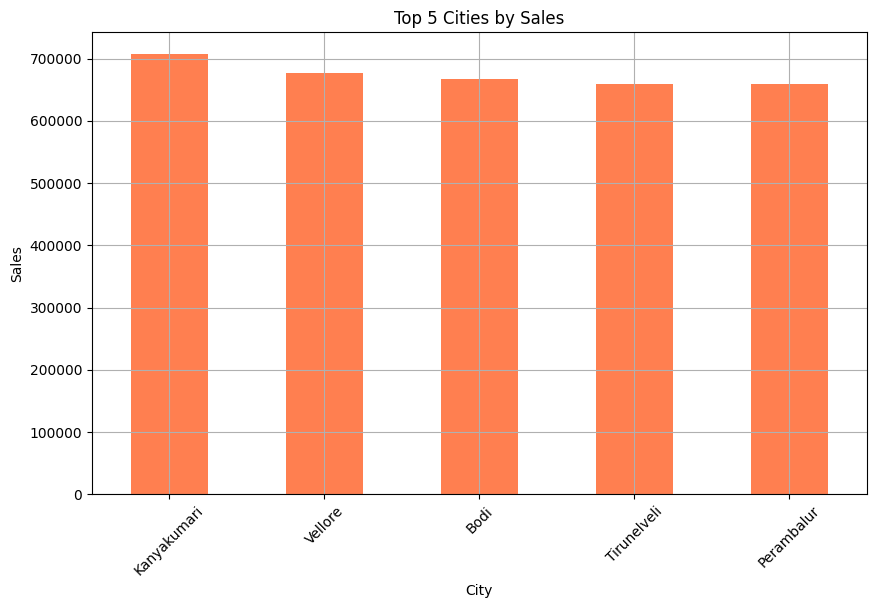

In [95]:
top_cities = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(5)
top_cities.plot(kind='bar', figsize=(10,6), color='coral')
plt.title("Top 5 Cities by Sales")
plt.xlabel("City")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [96]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode each categorical column
df['Category'] = le.fit_transform(df['Category'])
df['Sub Category'] = le.fit_transform(df['Sub Category'])
df['City'] = le.fit_transform(df['City'])
df['Region'] = le.fit_transform(df['Region'])
df['State'] = le.fit_transform(df['State'])
df.head()


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
0,OD1,Harish,5,14,21,2017-08-11,2,1254,0.12,401.28,0,11,8,2017
1,OD2,Sudha,1,13,8,2017-08-11,3,749,0.18,149.80,0,11,8,2017
2,OD3,Hussain,3,0,13,2017-12-06,4,2360,0.21,165.20,0,6,12,2017
3,OD4,Jackson,4,12,4,2016-11-10,3,896,0.25,89.60,0,10,11,2016
4,OD5,Ridhesh,3,18,12,2016-11-10,3,2355,0.26,918.45,0,10,11,2016


In [97]:
# Define input features (X) and target (y)
X = df.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])
y = df['Sales']

In [98]:
from sklearn.model_selection import train_test_split

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler on training data and transform both sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
from sklearn.linear_model import LinearRegression

# Initialize model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [101]:
# Predict on the test set
y_pred = model.predict(X_test)

In [102]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 212968.924794181
R²: 0.35428077144108516


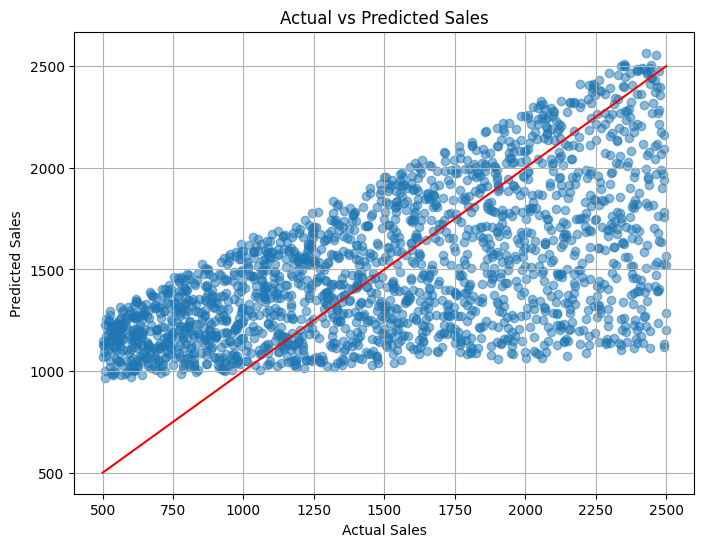

In [103]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.grid(True)
plt.show()

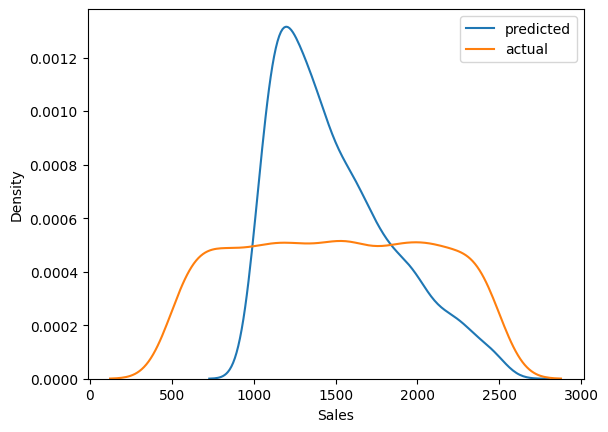

In [104]:
sns.kdeplot(y_pred, label='predicted')
sns.kdeplot(y_test,label='actual')
plt.legend()
plt.show()

In [117]:
import pandas as pd

# Load your dataset
data = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

In [118]:
# Convert Order Date to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce', dayfirst=True)

# Extract date parts
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.strftime('%B')
data['Is_Weekend'] = data['Order Date'].dt.dayofweek >= 5
data['DayOfWeek'] = data['Order Date'].dt.dayofweek

# Drop missing rows
data.dropna(inplace=True)

In [119]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month']:
    data[col] = le.fit_transform(data[col])

In [121]:
# Include new features
X = data.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])
y = data['Sales']

# Drop any remaining NaNs
df_model = pd.concat([X, y], axis=1).dropna()

X_clean = df_model.drop(columns='Sales')
y_clean = df_model['Sales']

In [125]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

y_log = np.log1p(y_clean)

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_log, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=300, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_log = rf_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test)

from sklearn.metrics import mean_squared_error, r2_score
print("MSE:", mean_squared_error(y_actual, y_pred))
print("R²:", r2_score(y_actual, y_pred))

MSE: 221776.25516784124
R²: 0.33704067540108074


In [127]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 1.8/124.9 MB 3.9 MB/s eta 0:00:32
    --------------------------------------- 2.9/124.9 MB 4.5 MB/s eta 0:00:27
   - -------------------------------------- 4.5/124.9 MB 5.1 MB/s eta 0:00:24
   - -------------------------------------- 5.5/124.9 MB 5.4 MB/s eta 0:00:23
   -- ------------------------------------- 6.8/124.9 MB 5.4 MB/s eta 0:00:22
   -- ------------------------------------- 8.4/124.9 MB 5.6 MB/s eta 0:00:21
   --- ------------------------------------ 9.7/124.9 MB 5.7 MB/s eta 0:00:21
   --- ------------------------------------ 11.3/124.9 MB 5.9 MB/s eta 0:00:20
   --- ------------------------------------ 12.3/124.9 MB 5.9 MB/s eta 0:00:20
   ---- ----------------------------------- 13.9/124.9 MB 6.0 MB/s eta 0:00:

In [130]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [131]:
# Log-transform target
y_log = np.log1p(y_clean)

# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_log, test_size=0.2, random_state=42)

# Feature scaling (optional for XGBoost, but helps)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
# Initialize and train
xgb_model = XGBRegressor(n_estimators=300, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_log = xgb_model.predict(X_test)

# Inverse transform predictions to original scale
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test)


In [133]:
mse = mean_squared_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

print("XGBoost MSE:", mse)
print("XGBoost R²:", r2)


XGBoost MSE: 256005.47548730386
XGBoost R²: 0.23471871686965595


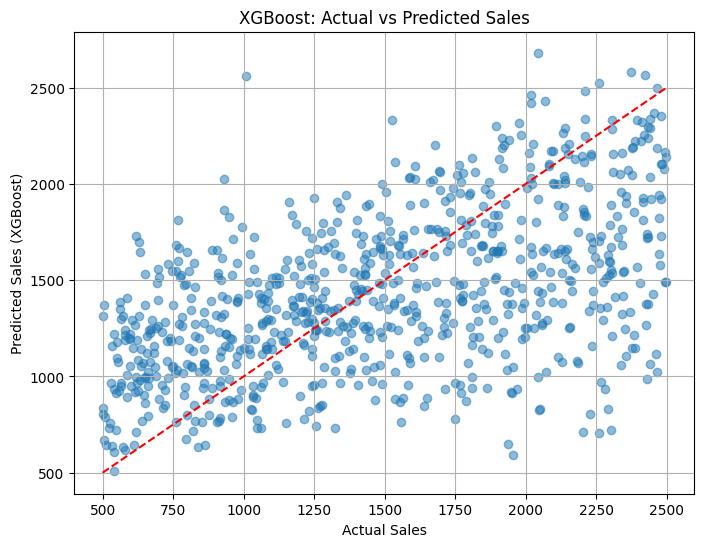

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
plt.scatter(y_actual, y_pred, alpha=0.5)
plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales (XGBoost)")
plt.title("XGBoost: Actual vs Predicted Sales")
plt.grid(True)
plt.show()


In [154]:
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Count outliers
outliers = data[(data['Sales'] < lower_bound) | (data['Sales'] > upper_bound)]
print("Number of outliers:", len(outliers))

Lower bound: -478.125
Upper bound: 3484.875
Number of outliers: 0


In [155]:
data_filtered = data[(data['Sales'] >= lower_bound) & (data['Sales'] <= upper_bound)]

print("Original rows:", len(data))
print("Filtered rows:", len(data_filtered))

Original rows: 4042
Filtered rows: 4042


In [166]:
# Rebuild X and y from filtered data
X = data_filtered.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])
y = data_filtered['Sales']

# Remove any NaNs if still present
df_model = pd.concat([X, y], axis=1).dropna()

X_clean = df_model.drop(columns='Sales')
y_clean = df_model['Sales']

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 216424.5578686301
R²: 0.35303859016548045


In [169]:
print(X_clean.shape, y_clean.shape)

(4042, 13) (4042,)


In [170]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [171]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [172]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost MSE (no log):", mse)
print("XGBoost R² (no log):", r2)


XGBoost MSE (no log): 262850.875
XGBoost R² (no log): 0.21425563097000122
